In [1]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_recall_curve,roc_curve
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn import discriminant_analysis
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix
import itertools
from itertools import cycle
from sklearn import discriminant_analysis
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score


Importing File into Panda DataFrame

In [2]:
df= pd.read_csv('creditcard.csv')

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
dfFraud = df[df.Class==1]
dfNorm = df[df.Class==0]
ratio = float(len(dfFraud))/len(dfNorm)
print(len(dfFraud))
print(len(dfNorm))
print(ratio)


492
284315
0.0017304750013189597


as you see the Number of Non-fraud cases are 284315
Number of fraud cases are 492
we have 492 frauds out of 284,807 transactions and the ratio of fraud to nonfraud transaction is 0.0017
The ratio of fraudulent transactions is very low. This is a case of class imbalance problem, and we are going to deal with this

Next we should find the null and missing values

In [5]:
np.where(df.applymap(lambda x: x == ''))


(array([], dtype=int64), array([], dtype=int64))

In [6]:
np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

As you see ,There is no missing and null value in the dataset .

Next we should normalize our data

In [7]:
scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)
sdf = pd.DataFrame(d, columns=names)
sdf.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0


we look at the data and visualize the fraud to non-fraud ratio.
we are going to..
1:Define the plot_data(X, y) function, that will nicely plot the given feature set X with labels y in a scatter plot. 
2:Use the function prep_data() on our dataset df to create feature set X and labels y.
3:Run the function plot_data() on our newly obtained X and y to visualize our results.

In [8]:
def prep_data(sdf: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
    Convert the DataFrame into two variable
    X: data columns (V1 - V28)
    y: lable column
    """
    X = sdf.iloc[:, 2:30].values
    y =sdf.Class.values

    return X, y

In [9]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

In [10]:
X, y = prep_data(sdf)

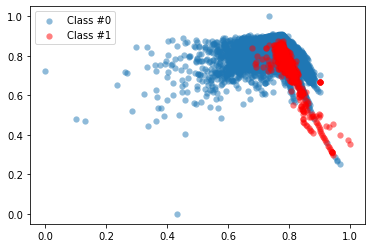

In [11]:
# Plot our data by running our plot data function on X and y
plot_data(X, y)

By visualizing the data, you can immediately see how our fraud cases are scattered over our data, and how few cases we have. A picture often makes the imbalance problem clear.

Reproduced using the DataFrame:

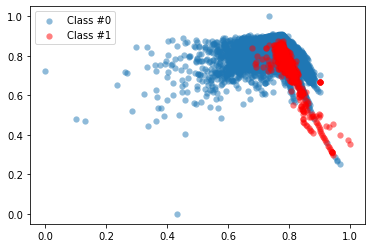

In [12]:
plt.scatter(sdf.V2[sdf.Class == 0], sdf.V3[sdf.Class == 0], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(sdf.V2[sdf.Class == 1], sdf.V3[sdf.Class == 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
plt.legend()
plt.show()

resampling can help model performance in cases of imbalanced data sets
SMOTE uses characteristics of nearest neighbors of fraud cases to create new synthetic fraud cases and
it is a way of adjusting the imbalance by oversampling minority observations
we're going to re-balance our data using the Synthetic Minority Over-sampling Technique (SMOTE). SMOTE does not create exact copies of observations, but creates new, synthetic, samples that are quite similar to the existing observations in the minority class. SMOTE is therefore slightly more sophisticated than just copying observations, so let's apply SMOTE to our credit card data. 

In [13]:
# Run the prep_data function
X, y = prep_data(sdf)

In [14]:
print(f'X shape: {X.shape}\ny shape: {y.shape}')

X shape: (284807, 28)
y shape: (284807,)


In [15]:
# Define the resampling method
method = SMOTE()

In [16]:
# Create the resampled feature set
X_resampled, y_resampled = method.fit_sample(X, y)

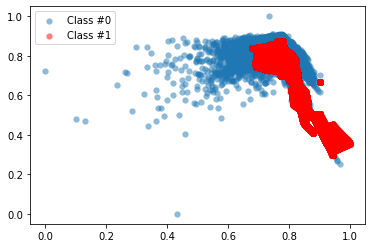

In [17]:
# Plot the resampled data
plot_data(X_resampled, y_resampled)

 you saw that using SMOTE suddenly gives us more observations of the minority class.

In [18]:
pd.value_counts(pd.Series(y))

0.0    284315
1.0       492
dtype: int64

In [19]:
pd.value_counts(pd.Series(y_resampled))

0.0    284315
1.0    284315
dtype: int64

In [20]:
def compare_plot(X: np.ndarray, y: np.ndarray, X_resampled: np.ndarray, y_resampled: np.ndarray, method: str):
    plt.subplot(1, 2, 1)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title('Original Set')
    plt.subplot(1, 2, 2)
    plt.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title(method)
    plt.legend()
    plt.show()

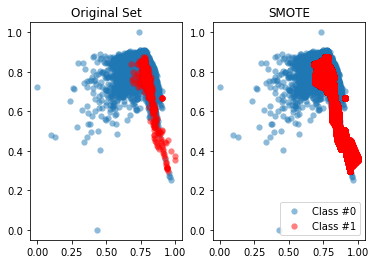

In [21]:
compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')

It should by now be clear that SMOTE has balanced our data completely, and that the minority class is now equal in size to the majority class. Visualizing the data shows the effect on the data very clearly. 

we will split the data into a training set and testing set which is  used for modeling and evaluating

In [22]:
# Split your data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

We are going to build different types of classification models and compare these with different evaluation metrics:

In [23]:

# : Define the model as RandomForest
RandomForestModel =  RandomForestClassifier(random_state=5, n_estimators=20)
#  Fit the model to the training data
RandomForestModel.fit(X_train, y_train)
# Obtain model predictions from the test data
rFor_y_predicted = RandomForestModel.predict(X_test)
#  Compare y_test to predictions and obtain performance metrics (r^2 score)

r2_score(y_test, rFor_y_predicted)

0.7123612714765083

In [24]:

# Define the model as LogisticRegression
LogisticRegressionModel = LogisticRegression(solver='liblinear')
#  Fit the model to the training data
LogisticRegressionModel.fit(X_train, y_train)
# Obtain model predictions from the test data
lReg_y_predicted = LogisticRegressionModel.predict(X_test)
# Compare y_test to predictions and obtain performance metrics (r^2 score)

r2_score(y_test, lReg_y_predicted)

0.4643968503355672

In [25]:
# Define the model as support vector machine
SVMmodel = SVC()
#  Fit the model to the training data
SVMmodel.fit(X_train, y_train)
# Obtain model predictions from the test data
svm_y_predicted = SVMmodel.predict(X_test)
# Compare y_test to predictions and obtain performance metrics (r^2 score)

r2_score(y_test, svm_y_predicted)

0.6429312335570447

The r2 score varies between 0 and 100%. It is closely related to the MSE, but not the same.
” …the proportion of the variance in the dependent variable that is predictable from the independent variable(s).”
Another definition is “(total variance explained by model) / total variance.” So if it is 100%, the two variables are perfectly correlated,100% means perfect correlation i.e., with no variance at all. A low value would show a low level of correlation, meaning a regression model that is not valid, but not in all cases. so we conclude that the Random forest model is better than the others in terms of R2 score.

Comparing the Confusion Matrix of different methods

In [26]:
# 3. Confusion Matrix
# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.cool):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


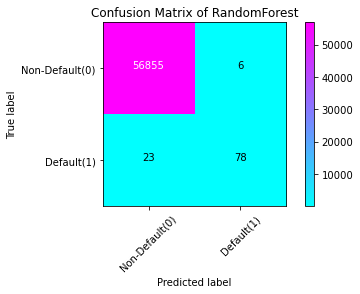

In [27]:
# Random Forest 

RandomForest_cm_plot = plot_confusion_matrix(confusion_matrix(y_test, rFor_y_predicted, labels = [0, 1]), 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'RandomForest')
plt.savefig('RandomForest_cm_plot.png')
plt.show()

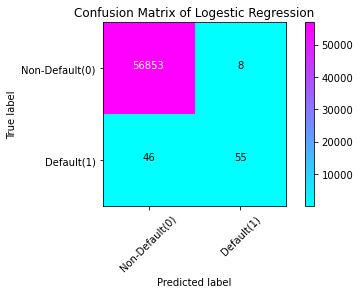

In [28]:
lReg_cm_plot = plot_confusion_matrix(confusion_matrix(y_test, lReg_y_predicted, labels = [0, 1]), 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logestic Regression')
plt.savefig('lReg_cm_plot.png')
plt.show()

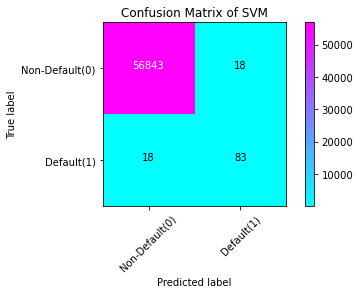

In [29]:
#  Support Vector Machine
svm_cm_plot = plot_confusion_matrix(confusion_matrix(y_test, svm_y_predicted, labels = [0, 1]), 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()


Look at the first row of RandomForest. The first row is for transactions whose actual fraud value in the test set is 0. As you can calculate, the fraud value of 56861 of them is 0. And out of these 56861 non-fraud transactions, the classifier correctly predicted 56855 of them as 0 and 6 of them as 1. It means, for 56855 non-fraud transactions, the actual churn value was 0in the test set, and the classifier also correctly predicted those as 0. We can say that our model has classified the non-fraud transactions pretty well.
Let’s look at the second row. It looks like there were 101 transactions whose fraud value was 1. The classifier correctly predicted 78 of them as 1, and 23 of them wrongly as 0. The wrongly predicted values can be considered as the error of the model

Look at the first row of Logestic Regression. The first row is for transactions whose actual fraud value in the test set is 0. As you can calculate, the fraud value of 56861 of them is 0. And out of these 56861 non-fraud transactions, the classifier correctly predicted 56853 of them as 0 and 8 of them as 1. It means, for 56853 non-fraud transactions, the actual churn value was 0in the test set, and the classifier also correctly predicted those as 0. We can say that our model has classified the non-fraud transactions pretty well.
Let’s look at the second row. It looks like there were 101 transactions whose fraud value was 1. The classifier correctly predicted 55 of them as 1, and 46 of them wrongly as 0. The wrongly predicted values can be considered as the error of the model

Look at the first row of SVM. The first row is for transactions whose actual fraud value in the test set is 0. As you can calculate, the fraud value of 56861 of them is 0. And out of these 56861 non-fraud transactions, the classifier correctly predicted 56843 of them as 0 and 18 of them as 1. It means, for 56843 non-fraud transactions, the actual churn value was 0in the test set, and the classifier also correctly predicted those as 0. We can say that our model has classified the non-fraud transactions pretty well.
Let’s look at the second row. It looks like there were 101 transactions whose fraud value was 1. The classifier correctly predicted 83 of them as 1, and 18 of them wrongly as 0. The wrongly predicted values can be considered as the error of the model

Like this, while comparing the confusion matrix of all the models, it can be seen that the SVM model has performed a very good job of classifying the fraud transactions from the non-fraud transactions. So we can conclude that the most appropriate model which can be used for our case is the SVM model and the model which can be neglected is the Logistic regression model.